In [2]:
#Libraries needed to import for project
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#Using pandas to load in the scraped data from our selenium bot
df = pd.read_csv(r'C:\Users\bboul\Desktop\scraped_project.csv')
df2 = pd.read_csv(r'C:\Users\bboul\Desktop\scraped_project_2.csv')
#Merged the two different Datasets together
df_merged = pd.concat([df,df2])
#Fonts dict used for formatting plots 
title_fonts={'weight': 'bold','fontsize':'36','fontfamily':'Lucida Sans Unicode'}
label_fonts={'weight': 'bold', 'fontsize':'30','fontfamily':'Lucida Sans Unicode'}

##### Cleaning Data

In [4]:
## Changing time to timestamp data type, also change time to local time and setting it to the index of the dataframe.
df_merged['Date/Time'] = pd.to_datetime(df_merged['Time'], utc = True, format = "%Y-%m-%dT%H:%M:%S.%f%z")
df_merged['Date/Time'] = df_merged['Date/Time'].dt.tz_convert('US/Central')
df_merged.set_index('Date/Time', inplace = True)
df_merged.drop(columns='Time', inplace=True ,axis=1)

#Removing non Integer values from likes columns
df_merged.drop(df_merged[(df_merged['Likes'] == 'meatchurch')|(df_merged['Likes'] == 'lococookers')|(df_merged['Likes'] == 'canamonroad')].index, inplace = True)

##### Creating new columns to explode data further

In [5]:
#Removing unwanted characters 
df_merged['Hashtags'] = df_merged['Hashtags'].str.replace("[\]\[]",'', regex = True)
df_merged['Likes'] = df_merged['Likes'].str.replace(",",'')

#Creating new column for Day of the Week and Hour of the day for each post
df_merged['Day of Week'] = df_merged.index.day_name()
df_merged['Time of Day'] = df_merged.index.hour
df_merged['Caption Length'] = df_merged['Caption'].apply(len)

#Changing data to correct data type
df_merged['Hashtags'] = df_merged['Hashtags'].astype('string')
df_merged['Likes'] = df_merged['Likes'].astype(int)
df_merged['Day of Week'] = pd.Categorical(df_merged['Day of Week'], ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
df_merged['Caption'] = df_merged['Caption'].astype('string')
df_merged['Caption'] = df_merged['Caption'].str.replace('\n','', regex=True)
df_merged['Caption'] = df_merged['Caption'].str.replace('-','', regex=True)

#Removing unwanted Data inlcuding post/image for privacy purpose
df_merged = df_merged.drop(columns=['Image','Post'])

#Chaning data to correct date type
df_merged['Hashtags'] = df_merged['Hashtags'].replace(np.nan, '', regex=True)

#Give copy of data a name
bbq_df = df_merged.copy()

##### Checking for duplicates

In [6]:
bbq_df[bbq_df.index.duplicated()]

,Caption,Likes,Hashtags,Day of Week,Time of Day,Caption Length
Date/Time,,,,,,
2021-11-07 11:04:00-06:00,Geraldene is loaded down with @rosewoodranches...,4510,"'#BBQ', '#TexasBBQ', '#ChefsForFarmers'",Sunday,11,259
2021-11-06 19:34:11-05:00,Fall Collection tease……Coming soon to meatchur...,1564,"'#StayTuned', '#BBQ', '#TexasBBQ'",Saturday,19,89
2021-11-06 19:08:23-05:00,The inaugural @troubadourfest is in the books!...,2770,"'#BBQ', '#TexasBBQ', '#TroubadourFestival', '#...",Saturday,19,719
2021-07-26 19:10:07-05:00,Shrimp Brochette seasoned with our Holy Voodoo...,2818,"'#BBQ', '#TexasBBQ', '#SummerGrillingSeries', ...",Monday,19,548
2019-07-22 08:03:10-05:00,Pork belly seasoned with our Honey Bacon BBQ a...,1471,"'#MeatChurch', '#PrairieFresh', '#TXWhiskey', ...",Monday,8,229
...,...,...,...,...,...,...
2018-10-08 12:34:22-05:00,Only 5 days until @smokedbbqfest in the Fort W...,526,"'#BBQ', '#Barbecue', '#Barbeque', '#Grill', '#...",Monday,12,461
2018-10-08 08:43:56-05:00,Everybody wish my BBQ brother @whiskeybentbbq ...,1074,,Monday,8,98
2018-10-07 18:31:09-05:00,Smofried beef bologna on smoked Gospel Ranch c...,1373,"'#tailgate', '#MeatChurch', '#Tailgating', '#a...",Sunday,18,664


##### Here we drop the duplicates found

In [7]:
bbq_df = bbq_df[~bbq_df.index.duplicated(keep='first')]

##### Verifying that we have sucessfully removed any Null values and duplicate values

In [8]:
f'Duplicates: {bbq_df.duplicated().sum()}', bbq_df.isnull().sum()

('Duplicates: 0',
 Caption           0
 Likes             0
 Hashtags          0
 Day of Week       0
 Time of Day       0
 Caption Length    0
 dtype: int64)

##### Small sample of the dataframe after formatting and adding necessary columns

In [9]:
bbq_df.head()

,Caption,Likes,Hashtags,Day of Week,Time of Day,Caption Length
Date/Time,,,,,,
2022-05-11 08:41:33-05:00,What a night! I hosted @meyhemlauren in my out...,63,"'#TraegerDay', '#BBQ', '#TexasBBQ', '#FuckThat...",Wednesday,8,671
2022-05-10 09:05:58-05:00,Let’s take another look at those killer Mexica...,1484,"'#traegerday', '#BBQ', '#TexasBBQ', '#Waxahach...",Tuesday,9,792
2022-05-09 19:51:06-05:00,Mexican Pulled Pork Egg Rolls.I got to host my...,2878,"'#BBQ', '#TexasBBQ', '#MexicanPulledPork', '#E...",Monday,19,601
2022-05-09 12:22:11-05:00,Amazing bark on this @traegergrills brisket sm...,8398,"'#BBQ', '#TexasBBQ', '#Brisket', '#TraegerDay'...",Monday,12,795
2022-05-08 19:07:53-05:00,Texas Style Pork Ribs in 60 seconds!@meatchurc...,5802,"'#BBQ', '#TexasBBQ', '#SpareRibs', '#Ribs', '#...",Sunday,19,333


##### Data Types and Data Stastical Description

In [10]:
bbq_df.info(),bbq_df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2933 entries, 2022-05-11 08:41:33-05:00 to 2017-06-30 11:28:50-05:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Caption         2933 non-null   string  
 1   Likes           2933 non-null   int32   
 2   Hashtags        2933 non-null   string  
 3   Day of Week     2933 non-null   category
 4   Time of Day     2933 non-null   int64   
 5   Caption Length  2933 non-null   int64   
dtypes: category(1), int32(1), int64(2), string(2)
memory usage: 129.2 KB


(None,
               Likes  Time of Day  Caption Length
 count   2933.000000  2933.000000     2933.000000
 mean    2963.059325    12.034095      308.678827
 std     2294.622438     4.613899      220.481461
 min       63.000000     0.000000       15.000000
 25%     1432.000000     8.000000      159.000000
 50%     2354.000000    10.000000      244.000000
 75%     3777.000000    18.000000      395.000000
 max    26303.000000    23.000000     2170.000000)

##### Using a Pairplot grouped by year we can see histograms and scatter plots to view our datas distribution

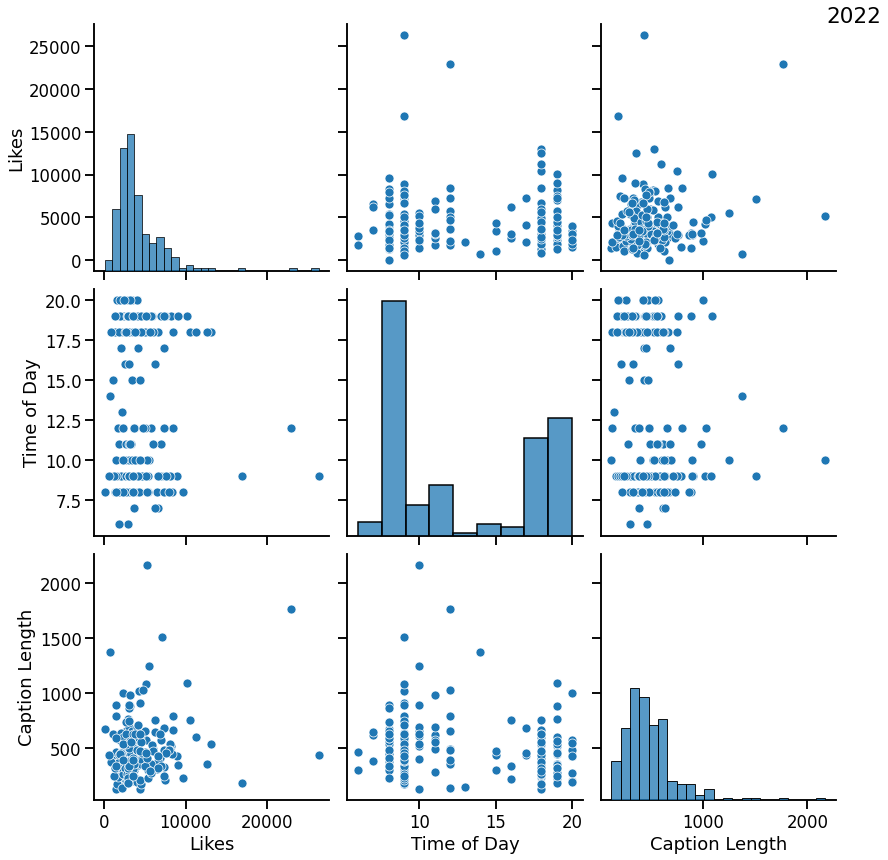

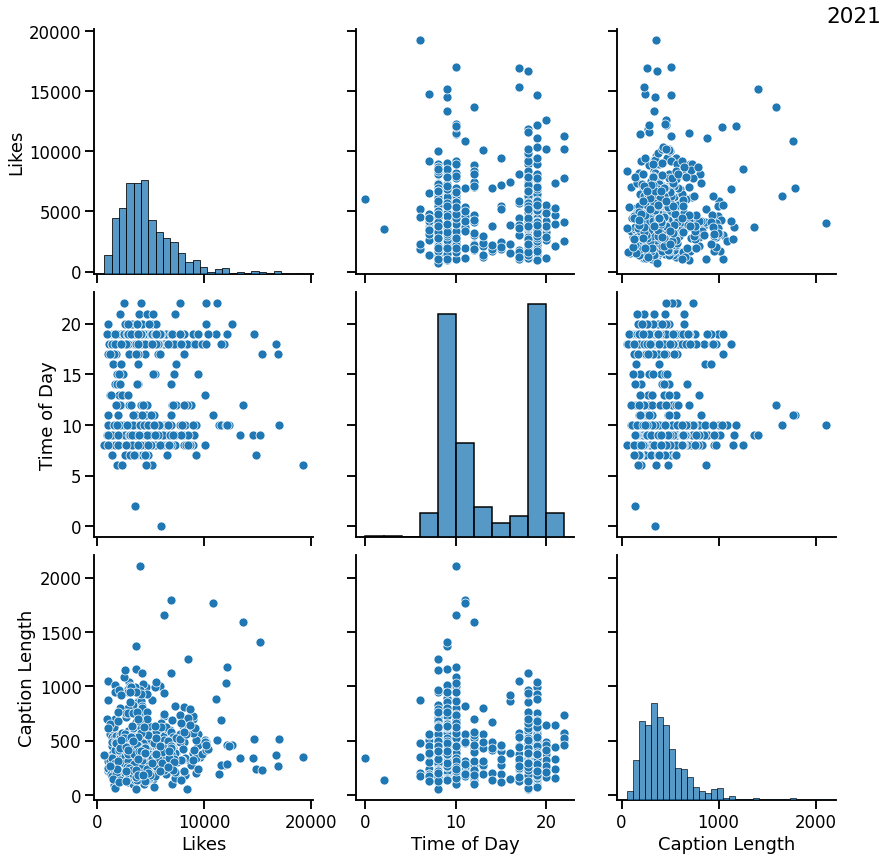

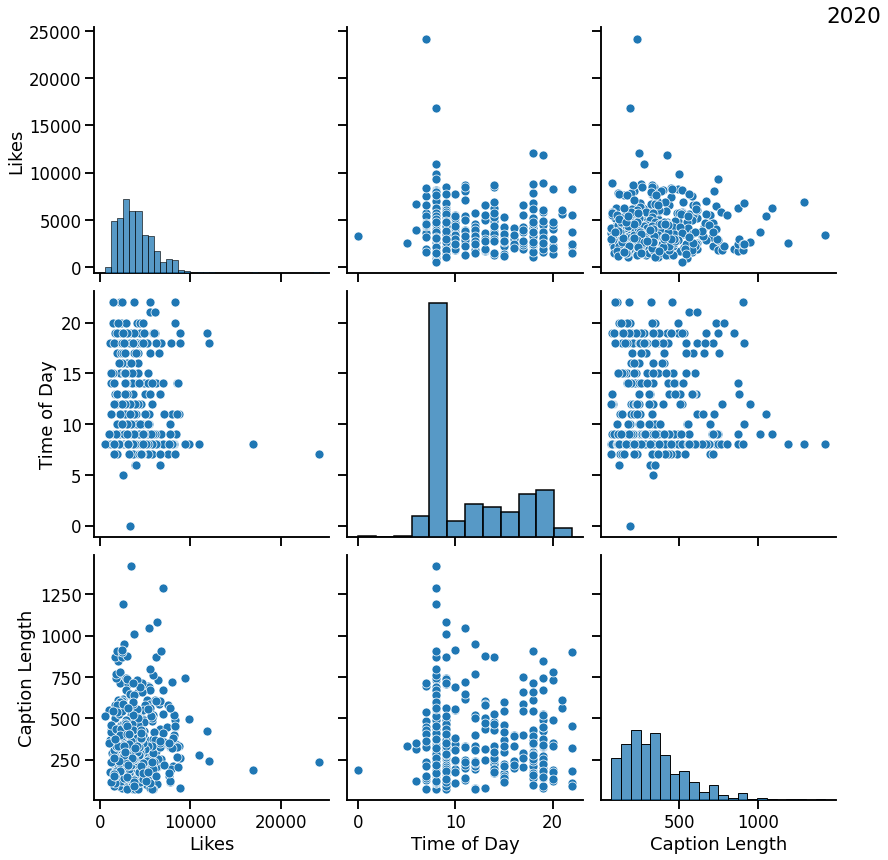

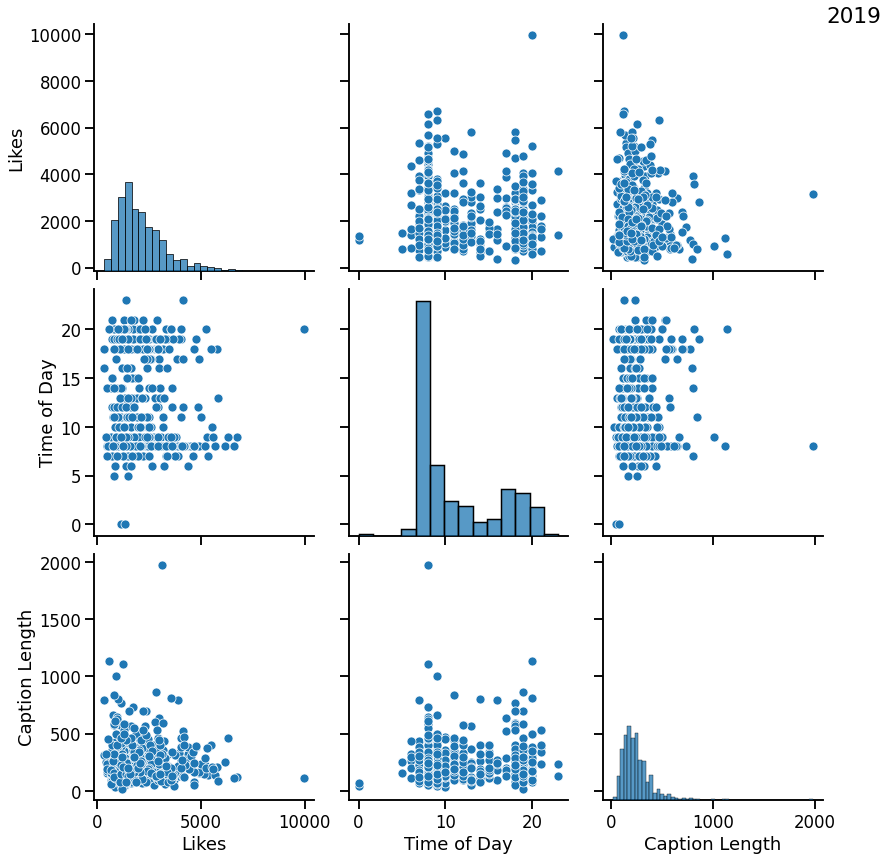

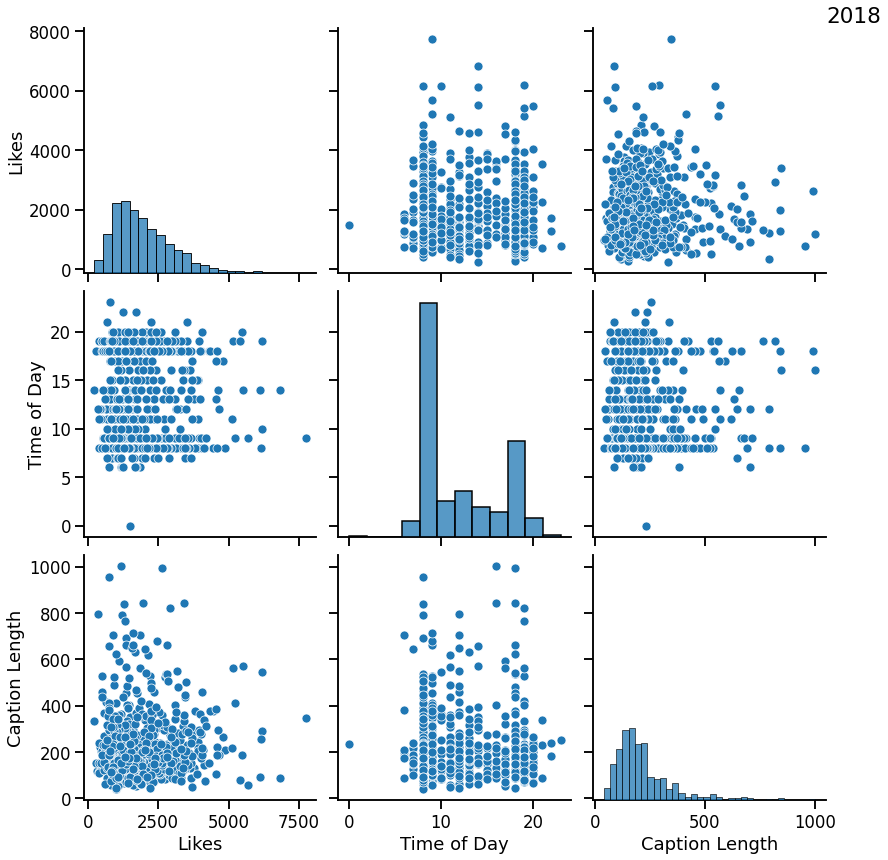

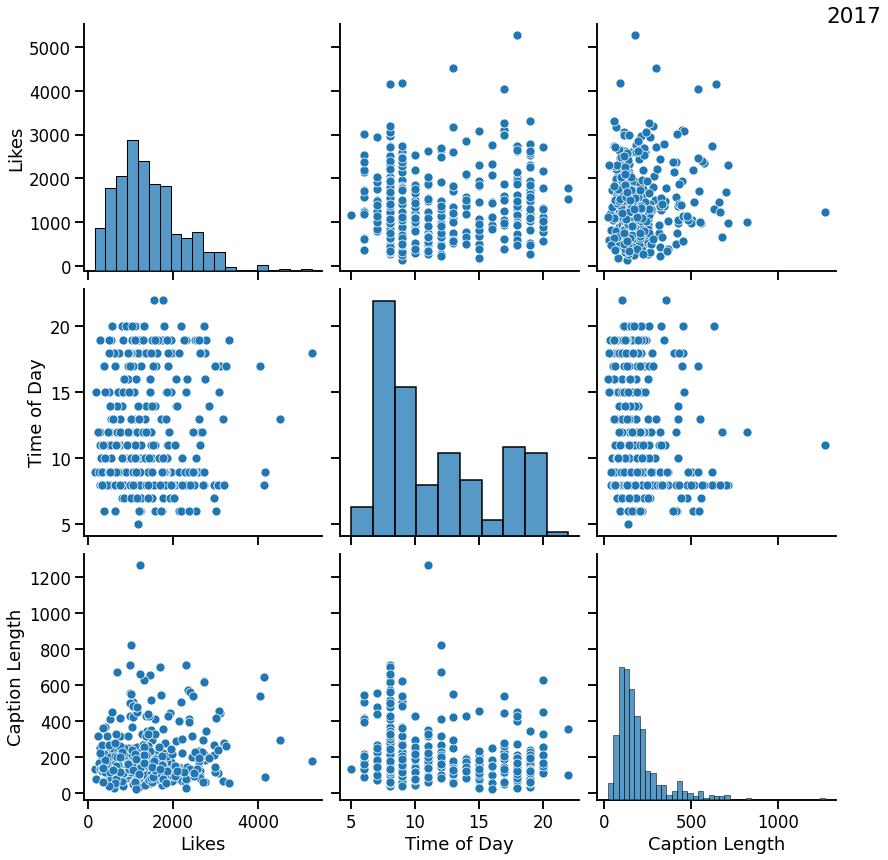

In [46]:
for year in bbq_df.index.year.unique():
    df=bbq_df.loc[bbq_df.index.year == year]
    ax=sns.pairplot(data=df, height=4)
    ax.fig.suptitle(f'{year}', x=1,y=1)
plt.show()

##### From the pair plots we can see most scatter plots are skewed to the right, as with the scatter plots we dont really see any correlation between the variables. Mainly the scatter plots show clusters of data no definitive trends.

##### Viewing average likes per year to view average performance each year

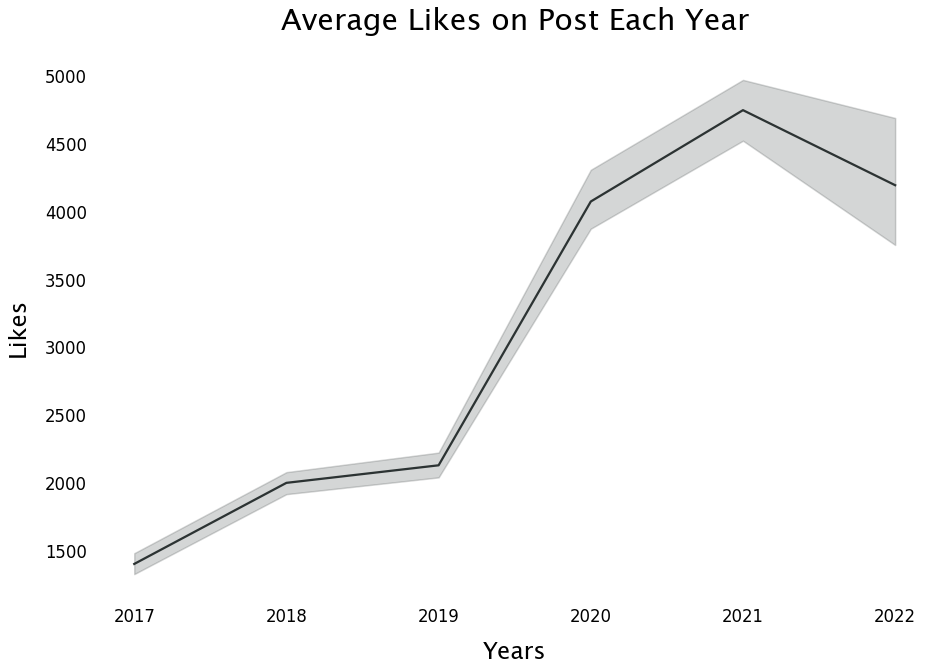

Likes                                                            \
           count         mean          std    min      25%     50%     75%   
Date/Time                                                                    
2017       411.0  1402.656934   775.978210  144.0   832.50  1253.0  1804.5   
2018       687.0  2001.046579  1091.075547  235.0  1188.00  1765.0  2606.0   
2019       602.0  2130.591362  1168.676105  343.0  1323.25  1877.5  2734.5   
2020       429.0  4077.205128  2265.742798  535.0  2567.00  3682.0  5120.0   
2021       601.0  4751.402662  2733.571694  692.0  2905.00  4165.0  5892.0   
2022       203.0  4197.596059  3189.643185   63.0  2342.50  3355.0  5073.0   

                   Time of Day             ...             Caption Length  \
               max       count       mean  ...   75%   max          count   
Date/Time                                  ...                              
2017        5273.0       411.0  11.739659  ...  15.0  22.0          411.0   
2018        7740.0       687.0  11.973799  ...  17.0  23.0          687.0   
2019        9950.0       602.0  11.313953  ...  15.0  23.0          602.0   
2020       24210.0       429.0  11.445221  ...  15.0  22.0          429.0   
2021       19223.0       601.0  13.131448  ...  18.0  22.0          601.0   
2022       26303.0       203.0  12.965517  ...  18.0  20.0          203.0   

                                                                       
                 mean         std    min    25%    50%    75%     max  
Date/Time                                                              
2017       197.732360  144.610735   21.0  110.5  153.0  225.0  1269.0  
2018       225.251820  144.679869   40.0  136.0  186.0  264.0  1003.0  
2019       251.212625  165.684868   15.0  151.0  220.0  303.0  1974.0  
2020       355.951049  209.263539   71.0  207.0  320.0  448.0  1422.0  
2021       441.304493  256.311475   54.0  274.0  384.0  537.0  2102.0  
2022       493.507389  269.260766  124.0  328.0  447.0  591.0  2170.0  

[6 rows x 24 columns]

In [34]:
fig,ax = plt.subplots(figsize=(15,10))
#Chart to show the average amount of likes on posts per year.
ax=sns.lineplot(data=bbq_df, x=bbq_df.index.year, y=bbq_df['Likes'], color='#2C3333')
ax.set_title('Average Likes on Post Each Year', fontdict=title_fonts, pad=25)
ax.set_xlabel('Years', fontdict=label_fonts, labelpad=15)
ax.set_ylabel('Likes', fontdict=label_fonts, labelpad=15)
ax.tick_params(left=False, bottom=False, pad=0)

sns.despine(top=True, right=True, bottom=True, left=True)
sns.set_context('talk')
plt.show()
years=bbq_df.groupby(bbq_df.index.year)
years.describe()

##### Here we can see that the mean in the 'Likes'  column almost doubled from 2019 to 2020. 2020 also had 180 fewer post than 2019. The only other variable that signifcantly changes is mean of caption length, which moved from 251 to 355 in 2020. Lets see what changed between those years more in-depth.

##### Viewing years 2019 and 2022 on a lineplot to see when most growth for the year was.

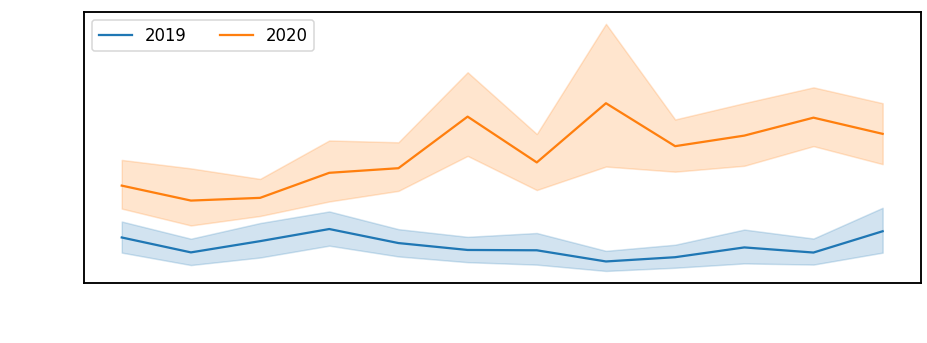

In [272]:
df_19_20 = bbq_df.loc[(bbq_df.index.year >= 2019)&(bbq_df.index.year <= 2020)]
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(15,5))

ax=sns.lineplot(data=df_19_20, x=df_19_20.index.month, y=df_19_20['Likes'], palette='tab10', hue=df_19_20.index.year)
ax.set_xlabel('Months', color='w')
ax.set_ylabel('Likes',color='w')

ax.tick_params(axis='both', color='w',labelcolor='w')
plt.legend(ncol=2, loc='upper left')
plt.show()

##### 2020 showed consistent growth from Feburary to June as well as growth from July to November.

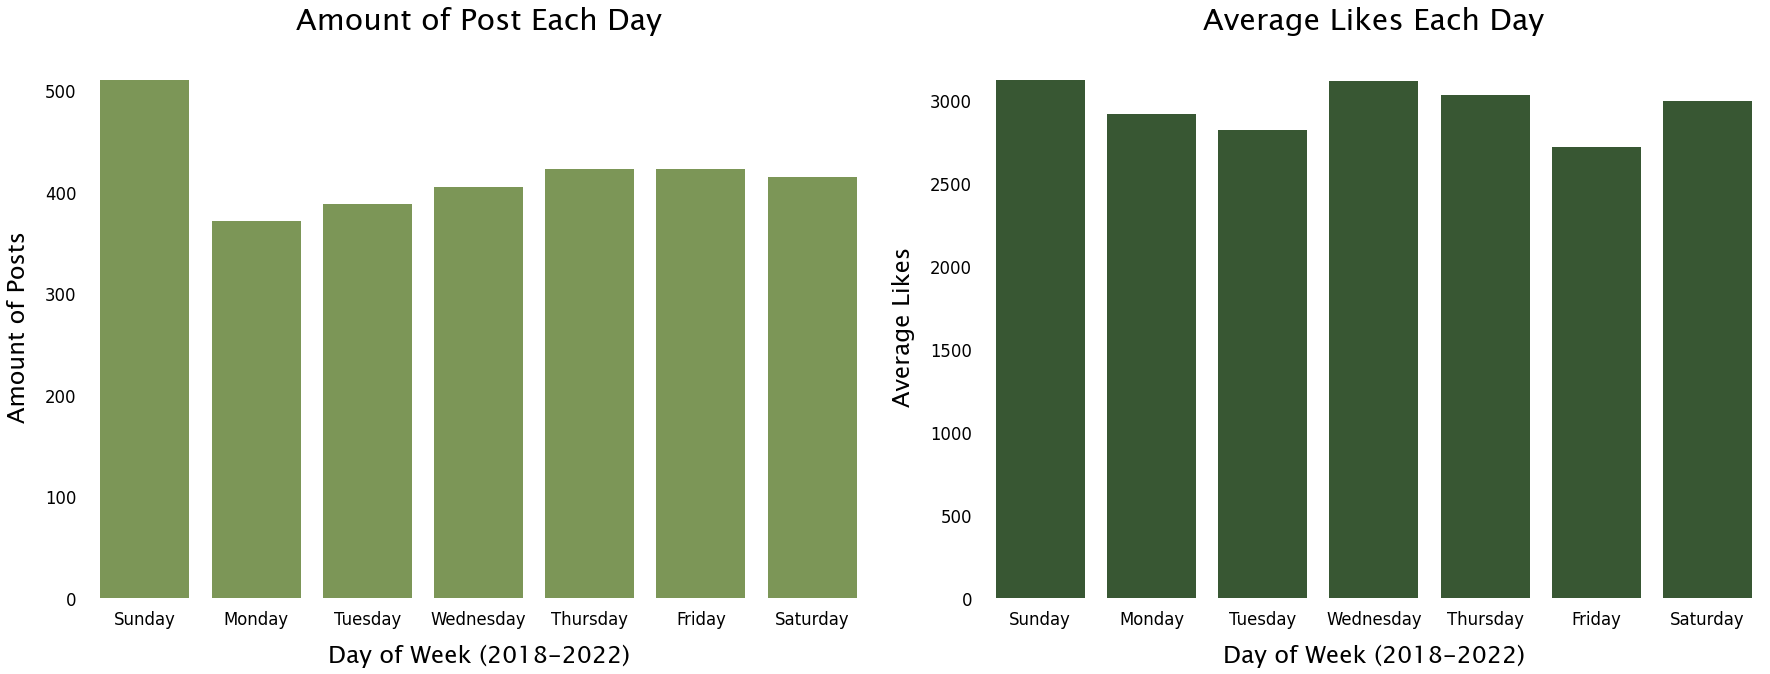

Day of Week
Sunday       3118
Wednesday    3113
Thursday     3030
Saturday     2990
Monday       2913
Tuesday      2815
Friday       2715
Name: Likes, dtype: int32              Caption  Likes  Hashtags  Time of Day  Caption Length
Day of Week                                                       
Sunday           510    510       510          510             510
Thursday         422    422       422          422             422
Friday           422    422       422          422             422
Saturday         415    415       415          415             415
Wednesday        405    405       405          405             405
Tuesday          388    388       388          388             388
Monday           371    371       371          371             371


In [36]:
#Code for figure and two axes 
fig, (ax,ax2) = plt.subplots(1,2, figsize=(30,10))

#code to remove border lines and set context to talk for plot
sns.despine(top=True, right=True, bottom=True, left=True)
sns.set_context('talk')

#Code for a countplot to show total amount of post for day of week.
ax = sns.countplot(data=bbq_df,  x=bbq_df['Day of Week'], ax=ax, color='#7EA04D')
#Code to format the plot
ax.set_title('Amount of Post Each Day', fontdict=title_fonts, pad=25)
ax.set_ylabel('Amount of Posts', fontdict=label_fonts, labelpad=15)
ax.set_xlabel('Day of Week (2018-2022)', fontdict=label_fonts, labelpad=15)
ax.tick_params(left=False, bottom=False)

#Code for a barplot showing average likes for each day of the week
ax2 = sns.barplot(data=bbq_df, x=bbq_df['Day of Week'], y=bbq_df['Likes'], ci=None, ax=ax2, color='#335D2D')
#Code to format the plot
ax2.set_title('Average Likes Each Day', fontdict=title_fonts, pad=25)
ax2.set_ylabel('Average Likes', fontdict=label_fonts, labelpad=15)
ax2.set_xlabel('Day of Week (2018-2022)', fontdict=label_fonts, labelpad=15)
ax2.tick_params(left=False, bottom=False)

#Code to adjust spacing
plt.subplots_adjust(wspace = 0.15)
plt.show()   
#Code to print values of plots
best_month=bbq_df.groupby(bbq_df['Day of Week'])['Likes'].mean().astype(int)
post_totals=bbq_df.groupby(bbq_df['Day of Week']).count().astype(int)
print(best_month.sort_values(ascending=False), post_totals.sort_values(by ='Likes', ascending=False))

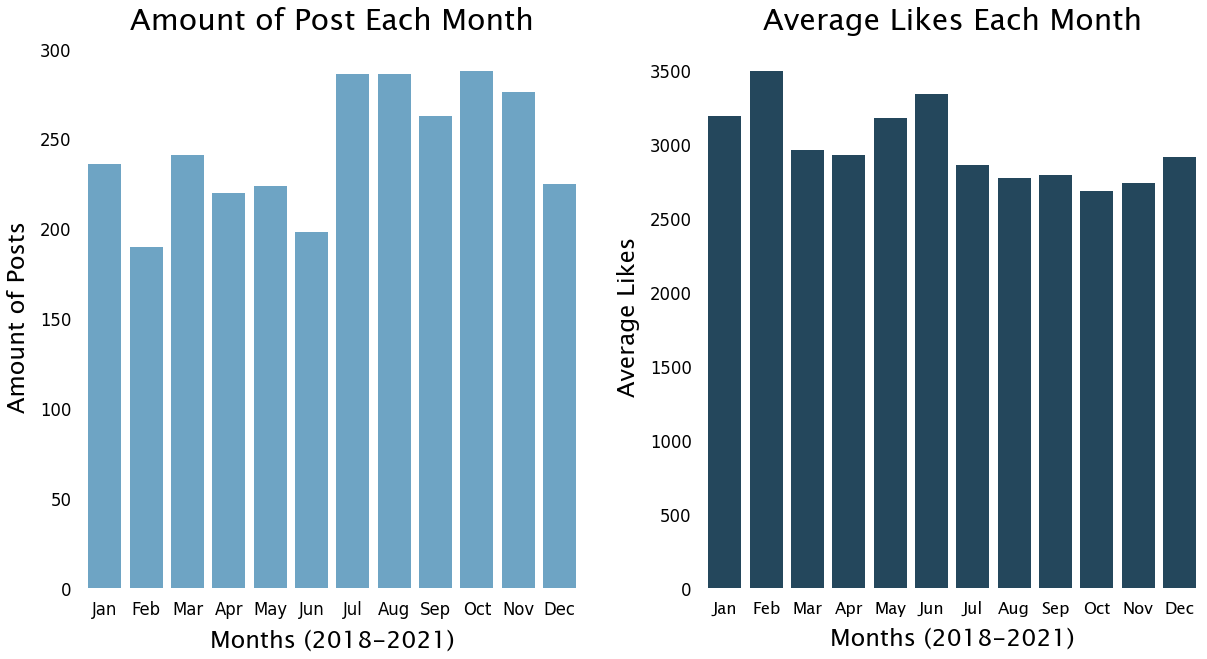

In [38]:
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#Code for figure and two axes 
fig, (ax,ax2)=plt.subplots(1,2, figsize=(20,10))

#Code for a countplot to show total amount of post each month of the year.
ax = sns.countplot(data=bbq_df,  x=bbq_df.index.month, ax=ax, color='#5fa8d3')
#Code to format the plot
ax.set_ylabel('Amount of Posts', fontdict=label_fonts, labelpad=10)
ax.set_xlabel('Months (2018-2021)', fontdict=label_fonts, labelpad=10)
ax.set_xticklabels(labels)
ax.set_title('Amount of Post Each Month', fontdict=title_fonts ,pad=15)
ax.tick_params(left=False, bottom=False)

#Code for a barplot to show average amounth of likes each month of the year.
ax2 = sns.barplot(data=bbq_df, x=bbq_df.index.month, y=bbq_df['Likes'], ci=None, ax=ax2, color='#1b4965')
#Code to format the plot
ax2.set_ylabel('Average Likes', fontdict=label_fonts, labelpad=10)
ax2.set_xlabel('Months (2018-2021)', fontdict=label_fonts, labelpad=10)
ax2.set_xticklabels(labels, fontfamily='Lucida Sans Unicode')
ax2.set_title('Average Likes Each Month', fontdict=title_fonts, pad=15)
ax2.tick_params(left=False, bottom=False)

#Code to adjust spacing    
sns.set_context('talk')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.subplots_adjust(wspace = 0.25)
plt.show()
#Code to print values of plots
best_month=bbq_df.groupby(bbq_df.index.month)['Likes'].mean().astype(int)
post_totals=bbq_df.groupby(bbq_df.index.month).count().astype(int)
print(best_month.sort_values(ascending=False), post_totals.sort_values(by ='Likes', ascending=False)

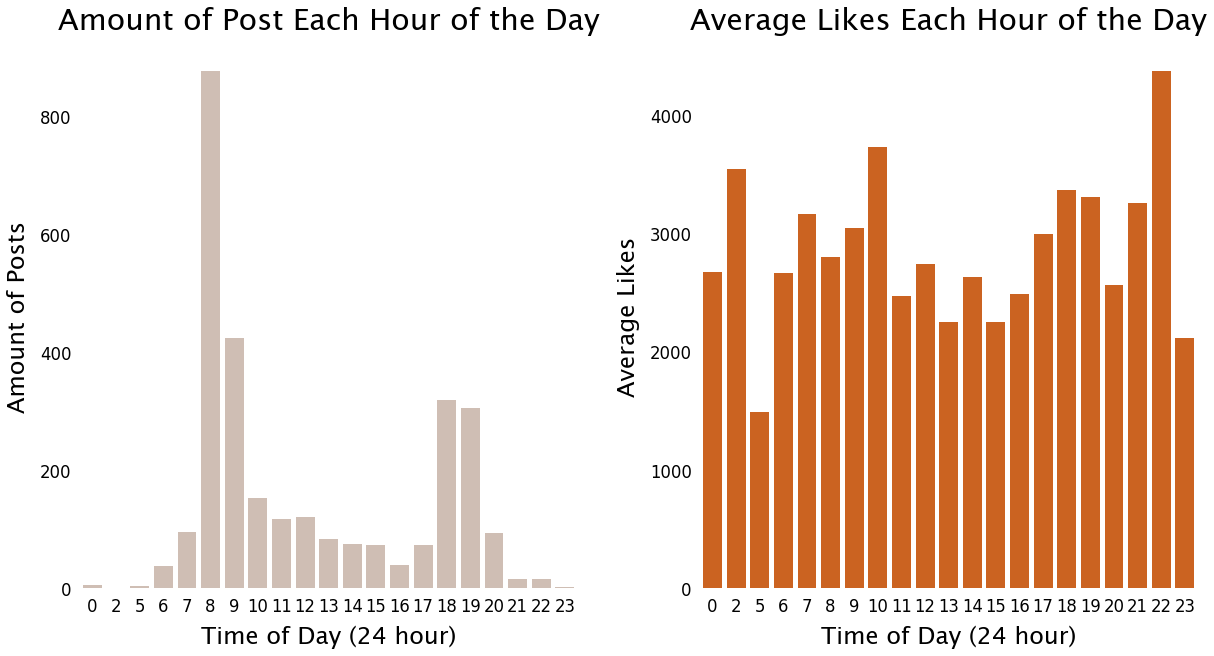

Date/Time
22    4377
10    3732
2     3544
18    3367
19    3312
21    3256
7     3163
9     3050
17    2995
8     2802
12    2744
0     2672
6     2668
14    2630
20    2561
16    2486
11    2471
13    2251
15    2250
23    2116
5     1486
Name: Likes, dtype: int32            Caption  Likes  Hashtags  Day of Week  Time of Day  Caption Length
Date/Time                                                                    
8              878    878       878          878          878             878
9              425    425       425          425          425             425
18             319    319       319          319          319             319
19             306    306       306          306          306             306
10             153    153       153          153          153             153
12             121    121       121          121          121             121
11             117    117       117          117          117             117
7               95     95      

In [42]:
#Code for figure and two axes 
fig, (ax,ax2)=plt.subplots(1,2, figsize=(20,10))

#Code for a countplot showing amount of post each hour of the day
ax = sns.countplot(data=bbq_df,  x=bbq_df.index.hour, color='#d3bdb0', ax=ax)
#Code to format the plot
ax.set_title('Amount of Post Each Hour of the Day', fontdict=title_fonts, pad=15)
ax.set_ylabel('Amount of Posts', fontdict=label_fonts, labelpad=10)
ax.set_xlabel('Time of Day (24 hour)', fontdict=label_fonts, labelpad=10)
ax.tick_params(right=False, bottom=False, left=False, pad=0)

#Code for a countplot showing average likes for post each hour of the day
ax2 = sns.barplot(data=bbq_df, x=bbq_df.index.hour, y=bbq_df['Likes'], ci=None, ax=ax2, color='#e85d04')
#Code to format the plot
ax2.set_title('Average Likes Each Hour of the Day', fontdict=title_fonts, pad=15)
ax2.set_ylabel('Average Likes', fontdict=label_fonts, labelpad=10)
ax2.set_xlabel('Time of Day (24 hour)', fontdict=label_fonts, labelpad=10)
ax2.tick_params(right=False, bottom=False, left=False, pad=0)

#Code to adjust spacing
sns.set_context('talk')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.subplots_adjust(wspace = 0.25)
plt.show()

#Code to print values of plots
best_month=bbq_df.groupby(bbq_df.index.hour)['Likes'].mean().astype(int)
post_totals=bbq_df.groupby(bbq_df.index.hour).count().astype(int)
print(best_month.sort_values(ascending=False), post_totals.sort_values(by ='Likes', ascending=False))

In [46]:
df['Hashtags'].value_counts()[:10]

['#BBQ']                              250
[]                                    105
['#BBQ', '#TexasBBQ']                  49
['#Repost']                            46
['#BBQ', '#TexasBBQ', '#Brisket']      20
['#BBQ', '#Traeger']                   15
['#BBQ', '#TexasBBQ', '#BeefRibs']      8
['#BBQ', '#TXWhiskey']                  7
['#StayTuned', '#BBQ']                  7
['#BBQ', '#YETI']                       7
Name: Hashtags, dtype: int64

##### These are the top combinations of hashtags used for this user.  
##### BBQ being the highest and using no hashtags in the caption being the second highest option